## Importing libraries

In [229]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams["figure.figsize"] = (10, 6)
import warnings
warnings.filterwarnings("ignore")

## EDA

In [230]:
df = pd.read_csv("co2.csv")

In [231]:
df.head(10)

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
5,ACURA,RLX,MID-SIZE,3.5,6,AS6,Z,11.9,7.7,10.0,28,230
6,ACURA,TL,MID-SIZE,3.5,6,AS6,Z,11.8,8.1,10.1,28,232
7,ACURA,TL AWD,MID-SIZE,3.7,6,AS6,Z,12.8,9.0,11.1,25,255
8,ACURA,TL AWD,MID-SIZE,3.7,6,M6,Z,13.4,9.5,11.6,24,267
9,ACURA,TSX,COMPACT,2.4,4,AS5,Z,10.6,7.5,9.2,31,212


In [232]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption City (L/100 km)  7385 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 10  Fuel Consumption Comb (mpg)       7385 non-null   int64  
 11  CO2 Emissions(g/km)               7385 non-null   int64  
dtypes: flo

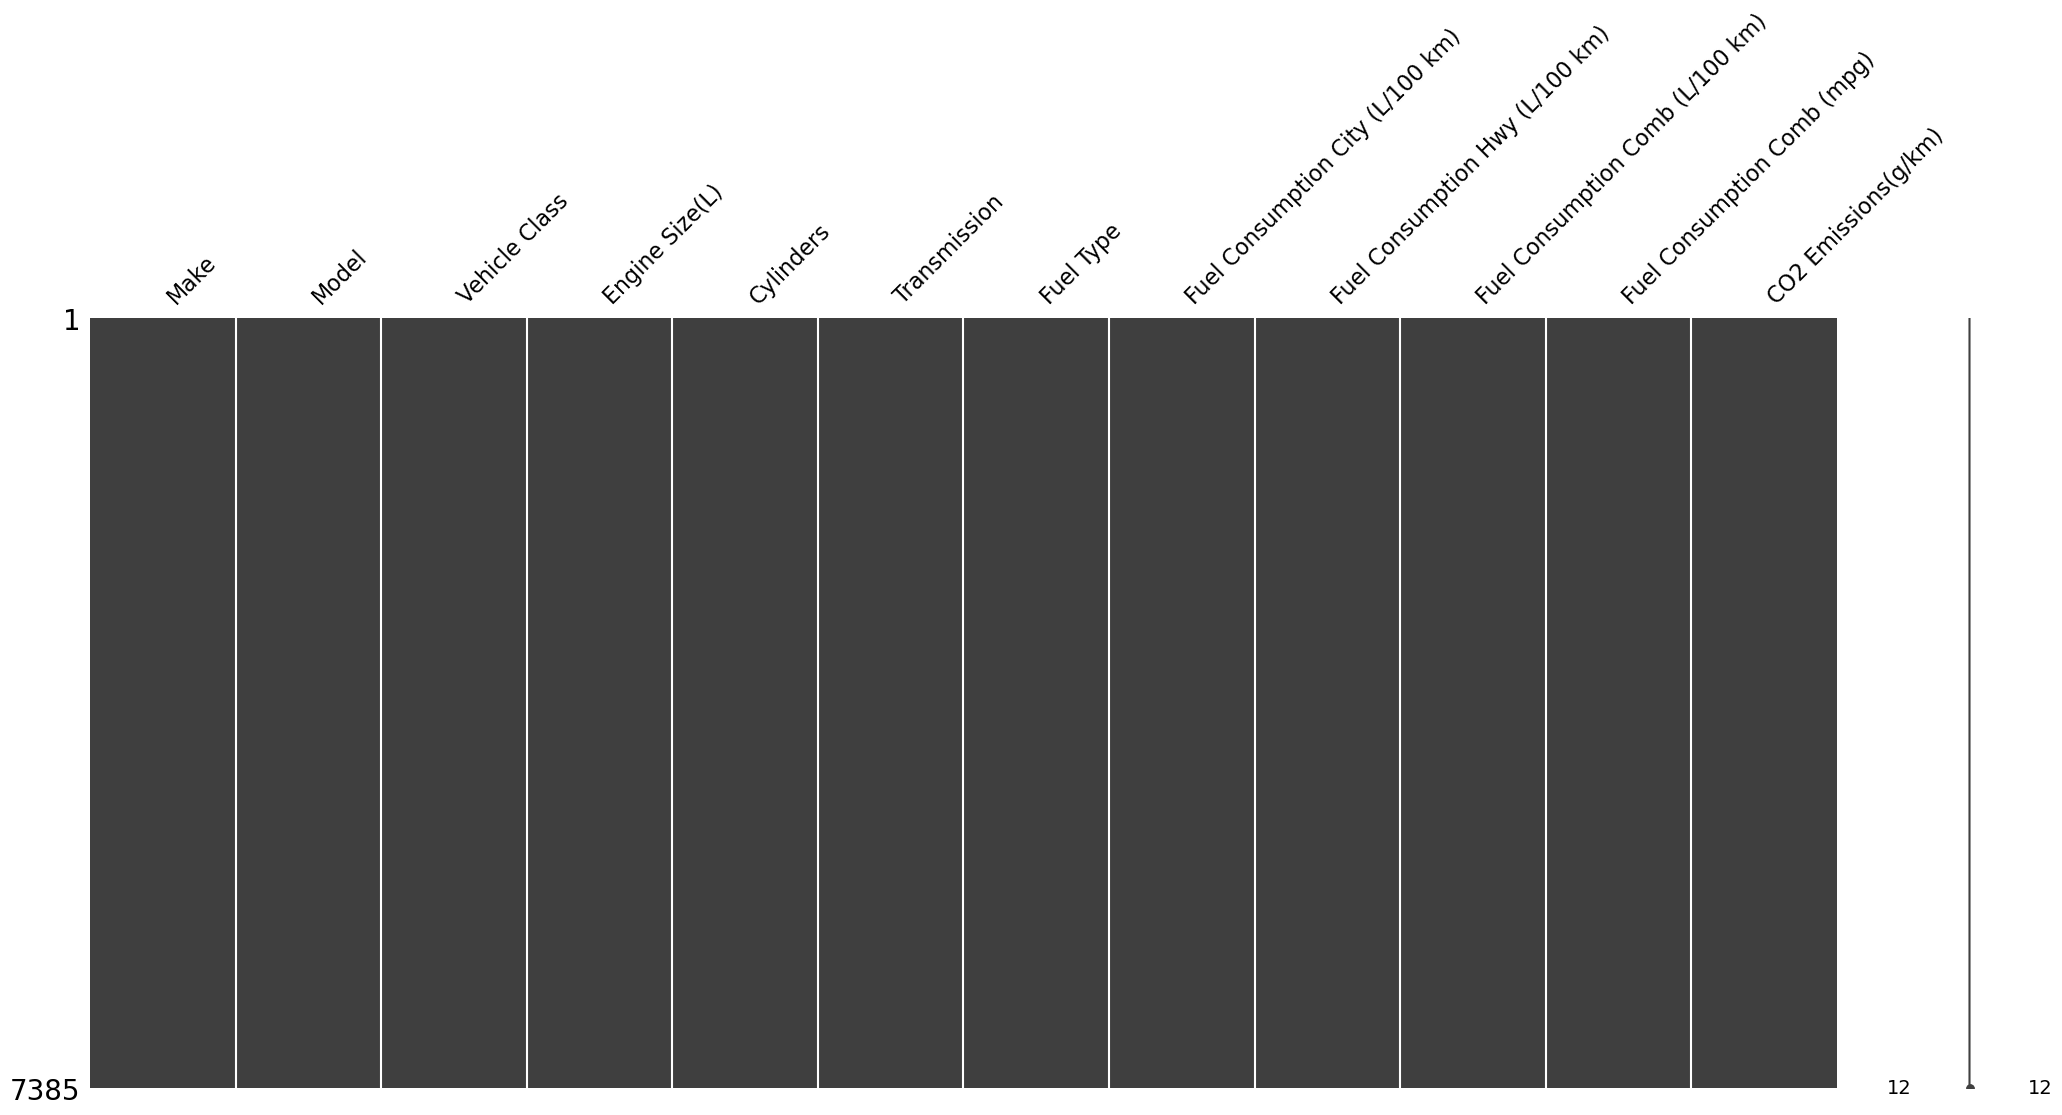

In [233]:
import missingno as msno
msno.matrix(df);

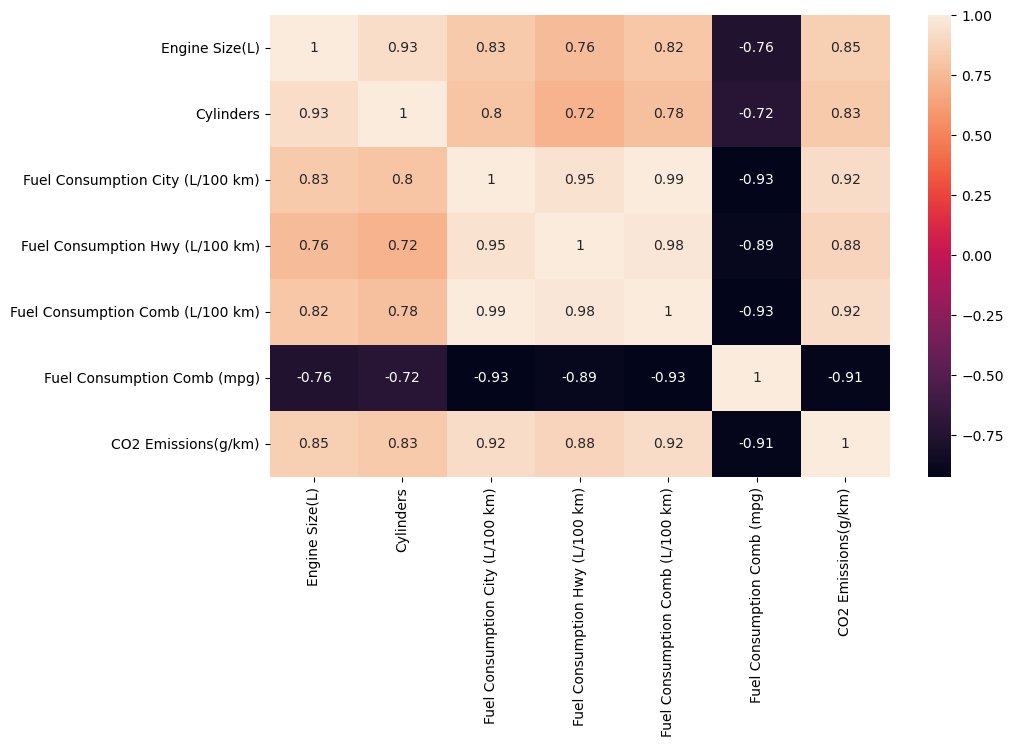

In [234]:
sns.heatmap(df.corr(), annot= True);
# loooks like we have multicolinearity in our data set (corr>90 in between some features)

In [235]:
# our task was given to use "CO2 Emissions(g/km) and "Engine Size(L)" for Simple Linear Regression Model.

In [236]:
corr = df["CO2 Emissions(g/km)"].corr(df["Engine Size(L)"])
corr

0.8511446437899972

In [237]:
df = df[["Engine Size(L)","CO2 Emissions(g/km)" ]]
df

,Engine Size(L),CO2 Emissions(g/km)
0,2.0,196
1,2.4,221
2,1.5,136
3,3.5,255
4,3.5,244
...,...,...
7380,2.0,219
7381,2.0,232
7382,2.0,240
7383,2.0,232


In [238]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Engine Size(L),7385.0,3.160068,1.354170,0.9,2.0,3.0,3.7,8.4
CO2 Emissions(g/km),7385.0,250.584699,58.512679,96.0,208.0,246.0,288.0,522.0


In [239]:
X = df[["Engine Size(L)"]]
y = df["CO2 Emissions(g/km)"]
# feature datafFrame should always be 2D array rather than 1D. To prevent error, we adjusted df dimension

In [240]:
print(X,y)

      Engine Size(L)
0                2.0
1                2.4
2                1.5
3                3.5
4                3.5
...              ...
7380             2.0
7381             2.0
7382             2.0
7383             2.0
7384             2.0

[7385 rows x 1 columns] 0       196
1       221
2       136
3       255
4       244
       ... 
7380    219
7381    232
7382    240
7383    232
7384    248
Name: CO2 Emissions(g/km), Length: 7385, dtype: int64


## Model Fitting

In [241]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [242]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [243]:
model.fit(X_train, y_train)

LinearRegression()

In [244]:
y_pred = model.predict(X_test)
y_pred

array([311.00214956, 207.71674396, 222.4718019 , ..., 251.98191779,
       266.73697573, 218.78303742])

In [245]:
my_dict = {"Actual" : y_test, "pred" : y_pred, "residual": y_test - y_pred}

In [246]:
comparing = pd.DataFrame(my_dict).sample(10)
comparing

,Actual,pred,residual
6530,205,207.716744,-2.716744
5475,312,325.757207,-13.757207
667,239,226.160566,12.839434
5263,241,244.604389,-3.604389
4925,301,340.512265,-39.512265
32,265,281.492034,-16.492034
2845,318,318.379679,-0.379679
1678,214,222.471802,-8.471802
2802,255,222.471802,32.528198
4844,299,329.445972,-30.445972


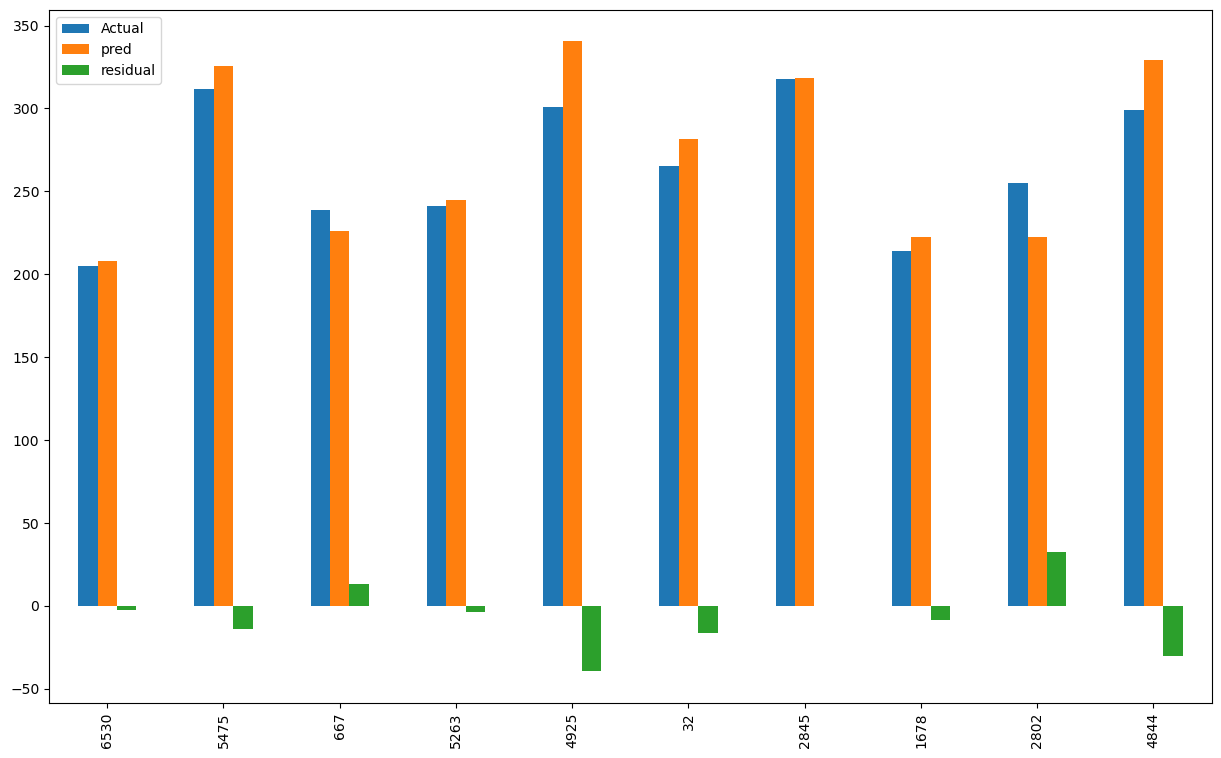

In [247]:
comparing.plot(kind = "bar", figsize = (15,9))
plt.show()

## Checking Error Metrics

In [248]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [249]:
R2_score = r2_score (y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

In [250]:
target_mean = df["CO2 Emissions(g/km)"].mean()

In [251]:
mae/ target_mean
# the more this value gets closer to zero, the better our predictions become

0.09429181342985485

In [252]:
rmse/ target_mean
# the more this value gets closer to zero, the better our predictions become

0.12424019789545548

In [253]:
def eval_metric(actual, pred):
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    rmse = np.sqrt(mean_squared_error(actual, pred))
    R2_score = r2_score(actual, pred)
    print("Model testing performance: ")
    print("---------------------------")
    print(f"R2_score \t: {R2_score}")
    print(f"MAE \t\t: {mae}")
    print(f"MSE \t\t: {mse}")
    print(f"RMSE \t\t: {rmse}")
    

In [254]:
eval_metric(y_test, y_pred)

Model testing performance: 
---------------------------
R2_score 	: 0.7334634385779222
MAE 		: 23.62808565947998
MSE 		: 969.2445458954962
RMSE 		: 31.13269255775183


In [255]:
y_train_pred = model.predict(X_train)

In [256]:
eval_metric(y_train, y_train_pred)

Model testing performance: 
---------------------------
R2_score 	: 0.7215099773899243
MAE 		: 23.20980472432297
MSE 		: 936.8384792758123
RMSE 		: 30.6078172902906


## Polynomial Features

In [257]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

In [258]:
# lets define a function to see what we get as r2 if we use polynomial features and cv working together (through a pipeline)
def r2_Poly(X_train, y_train):
    degrees_to_try = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

    # Initialize an empty list to store the results
    results = []

    # Loop through degrees and perform cross-validation
    for degree in degrees_to_try:
        model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
        scores = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')
        
        # Append the results for the current degree
        results.append((degree, np.mean(scores)))
        print(f"degree={degree}, Mean R2 Score: {np.mean(scores)}")

  

In [259]:
r2_Poly(X_train, y_train)

degree=1, Mean R2 Score: 0.7209997623305205
degree=2, Mean R2 Score: 0.7265876342427171
degree=3, Mean R2 Score: 0.7269519689768537
degree=4, Mean R2 Score: 0.7213516802209569
degree=5, Mean R2 Score: 0.7177431192217535
degree=6, Mean R2 Score: 0.7177030870631871
degree=7, Mean R2 Score: 0.7304851577490151
degree=8, Mean R2 Score: 0.7306450376484604
degree=9, Mean R2 Score: 0.719032220487294
degree=10, Mean R2 Score: 0.033761007057065306


##### polynomial features are generally used in datasets with multiple independent variables, adding higher-degree terms of a single independent variable to help the model capture non-linear relationships. However, in a dataset with only one variable, increasing the polynomial degree usually doesn't significantly improve the model's performance. This is because polynomial terms on a single variable often increase the complexity of the model, leading to an increased risk of overfitting rather than enhancing performance.

In [260]:
def poly(d):   # degree derecesi içine ne yazarsam ona göre çözüm oluşturacak
    train_rmse_errors = []   # trains rmse değerlerin toplayacak
    test_rmse_errors = []    # test rmse değerlerin toplayacak
    number_of_features = []  # derece arttıkça feature sayısının kaça çıktığnı göreceğiz
    for i in range(1, d):  # 1 den kaçıncı dereceye kadar istiyorsak ona göre yazacağız
        polynomial_converter = PolynomialFeatures(degree = i, include_bias =False)
        poly_features = polynomial_converter.fit_transform(X)
        X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)
        model = LinearRegression(fit_intercept=True)
        model.fit(X_train, y_train)
        train_pred = model.predict(X_train)
        test_pred = model.predict(X_test)
        train_RMSE = np.sqrt(mean_squared_error(y_train,train_pred))
        test_RMSE = np.sqrt(mean_squared_error(y_test,test_pred))
        train_rmse_errors.append(train_RMSE)
        test_rmse_errors.append(test_RMSE)
        number_of_features.append(poly_features.shape[1])
    return pd.DataFrame({"train_rmse_errors": train_rmse_errors, "test_rmse_errors":test_rmse_errors, "number of features":number_of_features},
                        index=range(1,d))

In [261]:
poly(10)

,train_rmse_errors,test_rmse_errors,number of features
1,31.138608,29.700154,1
2,30.845854,29.264198,2
3,30.779317,29.228791,3
4,30.765844,29.267251,4
5,30.737148,29.221933,5
6,30.643937,29.223244,6
7,30.452786,29.156160,7
8,30.449917,29.148114,8
9,30.435627,29.145331,9


In [262]:
# as we can see above, since there is only one feature we have, PolynomialFeatures did not work properly. Since we can not add
# more features exponentially, it did not significantly affect our error metrics. At this point, I will move into
# MultiLinear Regression model to be able to have better predictions

## MultiLinear Regression

In [263]:
df = pd.read_csv("co2.csv")

In [264]:
df.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [265]:
df.columns

Index(['Make', 'Model', 'Vehicle Class', 'Engine Size(L)', 'Cylinders',
       'Transmission', 'Fuel Type', 'Fuel Consumption City (L/100 km)',
       'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)',
       'Fuel Consumption Comb (mpg)', 'CO2 Emissions(g/km)'],
      dtype='object')

In [266]:
df = df[["Engine Size(L)",
        "Fuel Consumption City (L/100 km)",
        "Fuel Consumption Hwy (L/100 km)", 
        "Fuel Consumption Comb (L/100 km)", 
        "CO2 Emissions(g/km)"]]

In [267]:
df.head()

,Engine Size(L),Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),CO2 Emissions(g/km)
0,2.0,9.9,6.7,8.5,196
1,2.4,11.2,7.7,9.6,221
2,1.5,6.0,5.8,5.9,136
3,3.5,12.7,9.1,11.1,255
4,3.5,12.1,8.7,10.6,244


<AxesSubplot:>

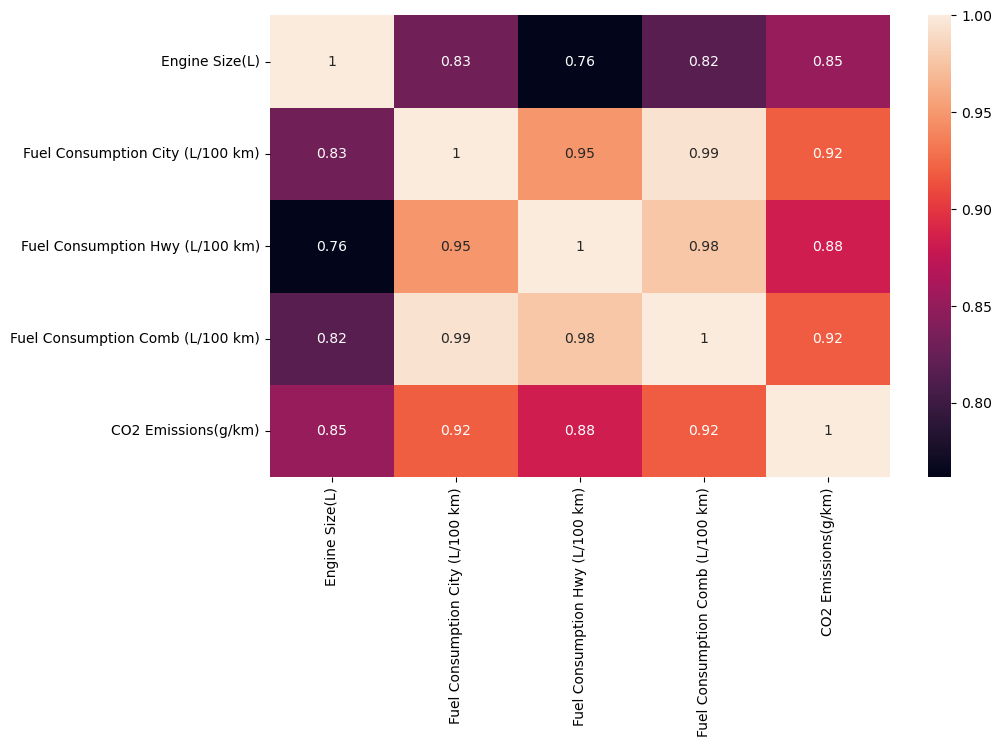

In [271]:
sns.heatmap(df.corr(), annot = True)

In [278]:
X = df.drop("CO2 Emissions(g/km)", axis =1)
y = df["CO2 Emissions(g/km)"] 

In [279]:
print(X,y)

      Engine Size(L)  Fuel Consumption City (L/100 km)  \
0                2.0                               9.9   
1                2.4                              11.2   
2                1.5                               6.0   
3                3.5                              12.7   
4                3.5                              12.1   
...              ...                               ...   
7380             2.0                              10.7   
7381             2.0                              11.2   
7382             2.0                              11.7   
7383             2.0                              11.2   
7384             2.0                              12.2   

      Fuel Consumption Hwy (L/100 km)  Fuel Consumption Comb (L/100 km)  
0                                 6.7                               8.5  
1                                 7.7                               9.6  
2                                 5.8                               5.9  
3      

## Model Fitting

In [280]:
# we will build our model according to default values. We have already done EDA above and already know there is multicolinearity,
# but first we want to see our default metrics

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [281]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(X_train, y_train)

LinearRegression()

In [282]:
y_pred = model.predict(X_test)

In [283]:
y_train_pred = model.predict(X_train)

In [284]:
eval_metric(y_test, y_pred)

Model testing performance: 
---------------------------
R2_score 	: 0.8809114920479975
MAE 		: 12.554882656656083
MSE 		: 382.0807710064382
RMSE 		: 19.546886478578582


In [285]:
eval_metric(y_train, y_train_pred)

Model testing performance: 
---------------------------
R2_score 	: 0.8720137721209096
MAE 		: 13.705715361201515
MSE 		: 445.007126668622
RMSE 		: 21.095192027299063


In [211]:
## it looks like there is no overfitting, but our R2 score is low.(underfitting) lets improve this

In [286]:
poly(10)

,train_rmse_errors,test_rmse_errors,number of features
1,20.855262,20.665769,4
2,16.661711,16.560362,14
3,15.820798,15.626022,34
4,14.199758,14.116195,69
5,13.517681,15.299602,125
6,12.263047,29.059171,209
7,11.063917,111.313483,329
8,11.101389,161.806051,494
9,15.032857,139.131723,714


In [287]:
r2_Poly(X_train, y_train)

degree=1, Mean R2 Score: 0.8710329707510687
degree=2, Mean R2 Score: 0.914781204797591
degree=3, Mean R2 Score: 0.9235805997242235
degree=4, Mean R2 Score: 0.9361731809418231
degree=5, Mean R2 Score: 0.9134119297390522
degree=6, Mean R2 Score: 0.7876518677555265
degree=7, Mean R2 Score: -0.036834400567351745
degree=8, Mean R2 Score: -30.964196654788758
degree=9, Mean R2 Score: -51.44978130794076
degree=10, Mean R2 Score: -522.9021580283909


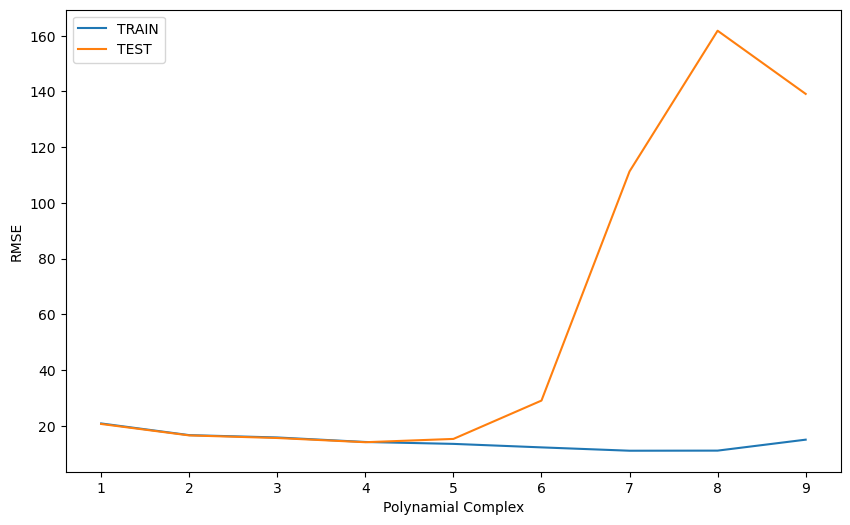

In [288]:
# visualizing 
plt.plot(range(1,10), poly(10)["train_rmse_errors"], label = "TRAIN")
plt.plot(range(1,10), poly(10)["test_rmse_errors"], label = "TEST")
plt.xlabel("Polynamial Complex")
plt.ylabel("RMSE")
plt.legend();
plt.show()

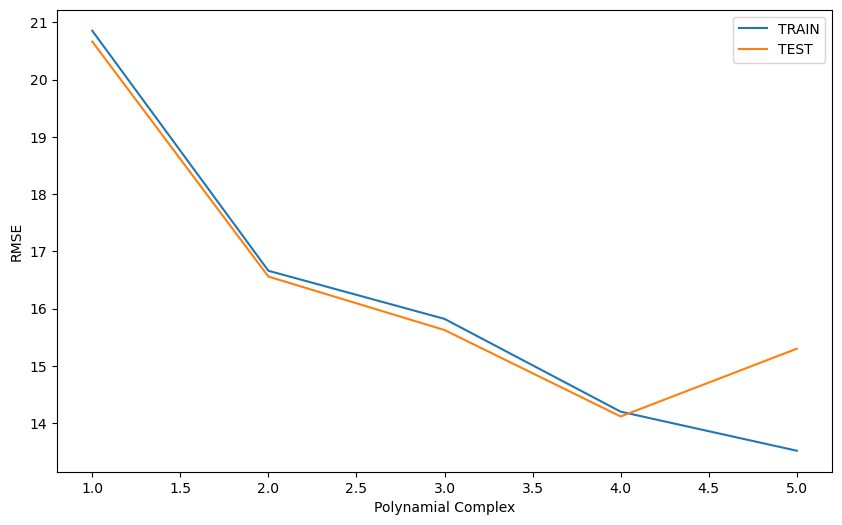

In [289]:
plt.plot(range(1,6), poly(6)["train_rmse_errors"], label = "TRAIN")
plt.plot(range(1,6), poly(6)["test_rmse_errors"], label = "TEST")
plt.xlabel("Polynamial Complex")
plt.ylabel("RMSE")
plt.legend();
plt.show()

In [217]:
# 4th degree looks well, so we can re-build our model accordingly

In [290]:
poly_converter = PolynomialFeatures(degree= 4, include_bias = False)
poly_features = poly_converter.fit_transform(X)

In [296]:
poly_features.shape # we have 69 features now

(7385, 69)

In [298]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size = 0.2)

###  As the degree of the polynomial increases, the model may become too complex and fit the noise in the data, leading to overfitting. Try to identify the point where the R2 scores start becoming negative, as this is an indication of overfittin

## Data Scaling

In [294]:
from scipy.stats import skew

In [299]:
for i in df.columns:
    print(i, skew(df[i]))

Engine Size(L) 0.8090166237091084
Fuel Consumption City (L/100 km) 0.8088403827811873
Fuel Consumption Hwy (L/100 km) 1.078997475325438
Fuel Consumption Comb (L/100 km) 0.8931342662031229
CO2 Emissions(g/km) 0.5259869435378954


In [ ]:
# -1, +1 arasi skewness normal dagilim olarak kabul edilir
# datamiza StandardScaler uygukama karari aldik

In [305]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
scaler = StandardScaler()

In [306]:
scaler.fit(X_train)

StandardScaler()

In [307]:
X_train_scaled = scaler.transform(X_train)

In [308]:
X_test_scaled = scaler.transform(X_test)
# we apply only transform method yo our test data

In [309]:
from sklearn.linear_model import LinearRegression
scaled_model = LinearRegression()

In [310]:
scaled_model.fit(X_train_scaled, y_train)

LinearRegression()

In [311]:
y_pred = scaled_model.predict(X_test_scaled)

In [312]:
eval_metric(y_test, y_pred)

Model testing performance: 
---------------------------
R2_score 	: 0.9470797395538791
MAE 		: 7.210266217031297
MSE 		: 191.20384723934822
RMSE 		: 13.827647928673489


In [313]:
y_train_pred = scaled_model.predict(X_train_scaled)

In [314]:
eval_metric(y_train, y_train_pred)

Model testing performance: 
---------------------------
R2_score 	: 0.9397878368180601
MAE 		: 7.2139755296467465
MSE 		: 203.23147293497638
RMSE 		: 14.25592764203636


## Cross Validate

In [315]:
from sklearn.model_selection import cross_validate, cross_val_score

In [316]:
model = LinearRegression()
scores = cross_validate(model, X_train_scaled, y_train, 
                        scoring = ['r2', 'neg_mean_absolute_error','neg_mean_squared_error', \
                                    'neg_root_mean_squared_error'], cv = 10, return_train_score=True)


In [317]:
pd.DataFrame(scores, index = range(1,11))

,fit_time,score_time,test_r2,train_r2,test_neg_mean_absolute_error,train_neg_mean_absolute_error,test_neg_mean_squared_error,train_neg_mean_squared_error,test_neg_root_mean_squared_error,train_neg_root_mean_squared_error
1,0.062386,0.0,0.931121,0.940483,-7.513654,-7.244347,-229.465965,-201.169729,-15.148134,-14.183431
2,0.008507,0.0,0.934969,0.940006,-7.064129,-7.250487,-218.673912,-202.567567,-14.787627,-14.232623
3,0.015636,0.0,0.939276,0.939671,-6.926668,-7.279217,-201.395072,-204.017709,-14.191373,-14.283477
4,0.015823,0.0,0.933375,0.940336,-7.730230,-7.111765,-210.744677,-202.781017,-14.517048,-14.240120
5,0.019148,0.0,0.929115,0.940522,-7.813805,-7.235937,-223.245227,-202.243989,-14.941393,-14.221251
6,0.012507,0.0,0.928022,0.940859,-8.013667,-7.006735,-275.922058,-196.582213,-16.610902,-14.020778
7,0.017797,0.0,0.940292,0.938438,-7.251341,-7.224012,-216.357010,-206.074182,-14.709079,-14.355284
8,0.015202,0.0,0.931262,0.940069,-7.414898,-7.218608,-227.752858,-202.612838,-15.091483,-14.234214
9,0.001273,0.0,0.948035,0.938783,-6.978231,-7.302047,-173.505936,-206.869249,-13.172165,-14.382950
10,0.000000,0.0,0.910860,0.940621,-7.686461,-7.228585,-294.048938,-200.913982,-17.147855,-14.174413


In [318]:
scores = pd.DataFrame(scores, index=range(1,11))
scores.iloc[:, 2:].mean()

test_r2                                0.932633
train_r2                               0.939979
test_neg_mean_absolute_error          -7.439308
train_neg_mean_absolute_error         -7.210174
test_neg_mean_squared_error         -227.111165
train_neg_mean_squared_error        -202.583247
test_neg_root_mean_squared_error     -15.031706
train_neg_root_mean_squared_error    -14.232854
dtype: float64

## Regularization- Elastic Net

In [335]:
from sklearn.linear_model import ElasticNet, ElasticNetCV

In [336]:
elastic_model = ElasticNet( alpha = 1.0, l1_ratio = 0.5, random_state = 42, max_iter = 1000)

In [337]:
elastic_model.fit(X_train_scaled, y_train)

ElasticNet(random_state=42)

In [338]:
y_pred = elastic_model.predict(X_test_scaled)
y_train_pred = elastic_model.predict(X_train_scaled)

In [339]:
eval_metric(y_test, y_pred)

Model testing performance: 
---------------------------
R2_score 	: 0.8777373462297867
MAE 		: 15.04420646290745
MSE 		: 441.74177484175175
RMSE 		: 21.01765388528776


In [340]:
model = ElasticNet(alpha=1, l1_ratio=0.5, random_state=42)
scores = cross_validate(model, X_train_scaled, y_train,
                        scoring=['r2', 'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'], cv=10)

In [341]:
scores = pd.DataFrame(scores, index = range(1,11))
scores.iloc[:, 2:]

,test_r2,test_neg_mean_absolute_error,test_neg_mean_squared_error,test_neg_root_mean_squared_error
1,0.856658,-15.520411,-477.537702,-21.852636
2,0.869399,-14.823468,-439.159554,-20.956134
3,0.871088,-14.464107,-427.544997,-20.677161
4,0.854017,-15.295547,-461.764428,-21.488705
5,0.845551,-15.166577,-486.418452,-22.054896
6,0.866622,-15.908103,-511.298242,-22.611905
7,0.873859,-15.009993,-457.087052,-21.379594
8,0.866138,-14.717097,-443.531365,-21.060184
9,0.868196,-14.795571,-440.083410,-20.978165
10,0.863545,-15.182432,-450.126022,-21.216174


In [342]:
scores = pd.DataFrame(scores, index = range(1,6))
scores.iloc[:, 2:].mean()

test_r2                               0.859343
test_neg_mean_absolute_error        -15.054022
test_neg_mean_squared_error        -458.485026
test_neg_root_mean_squared_error    -21.405906
dtype: float64

## Grid Search

In [343]:
from sklearn.model_selection import GridSearchCV

In [344]:
alpha_space = np.linspace(0.01, 1, 100)

param_grid = {"alpha": alpha_space}

grid_model = GridSearchCV(estimator = elastic_model, param_grid = param_grid, scoring = 'neg_root_mean_squared_error',
                         cv =10, verbose =2, return_train_score=True)

In [345]:
grid_model.fit(X_train_scaled, y_train)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
[CV] END .........................................alpha=0.01; total time=   0.3s
[CV] END .........................................alpha=0.01; total time=   0.2s
[CV] END .........................................alpha=0.01; total time=   0.3s
[CV] END .........................................alpha=0.01; total time=   0.2s
[CV] END .........................................alpha=0.01; total time=   0.2s
[CV] END .........................................alpha=0.01; total time=   0.2s
[CV] END .........................................alpha=0.01; total time=   0.3s
[CV] END .........................................alpha=0.01; total time=   0.3s
[CV] END .........................................alpha=0.01; total time=   0.2s
[CV] END .........................................alpha=0.01; total time=   0.2s
[CV] END .........................................alpha=0.02; total time=   0.3s
[CV] END ...................................

[CV] END .........................................alpha=0.11; total time=   0.2s
[CV] END .........................................alpha=0.11; total time=   0.2s
[CV] END .........................................alpha=0.11; total time=   0.1s
[CV] END .........................................alpha=0.11; total time=   0.1s
[CV] END .........................................alpha=0.11; total time=   0.1s
[CV] END .........................................alpha=0.11; total time=   0.2s
[CV] END .........................................alpha=0.11; total time=   0.2s
[CV] END .........................................alpha=0.11; total time=   0.2s
[CV] END .........................................alpha=0.11; total time=   0.2s
[CV] END .........................................alpha=0.12; total time=   0.2s
[CV] END .........................................alpha=0.12; total time=   0.2s
[CV] END .........................................alpha=0.12; total time=   0.2s
[CV] END ...................

[CV] END ..........................alpha=0.21000000000000002; total time=   0.2s
[CV] END ..........................alpha=0.21000000000000002; total time=   0.2s
[CV] END ..........................alpha=0.21000000000000002; total time=   0.2s
[CV] END ..........................alpha=0.21000000000000002; total time=   0.2s
[CV] END ..........................alpha=0.21000000000000002; total time=   0.2s
[CV] END ..........................alpha=0.21000000000000002; total time=   0.2s
[CV] END ..........................alpha=0.21000000000000002; total time=   0.2s
[CV] END .........................................alpha=0.22; total time=   0.2s
[CV] END .........................................alpha=0.22; total time=   0.2s
[CV] END .........................................alpha=0.22; total time=   0.2s
[CV] END .........................................alpha=0.22; total time=   0.2s
[CV] END .........................................alpha=0.22; total time=   0.2s
[CV] END ...................

[CV] END .........................................alpha=0.31; total time=   0.2s
[CV] END .........................................alpha=0.31; total time=   0.1s
[CV] END .........................................alpha=0.31; total time=   0.1s
[CV] END .........................................alpha=0.31; total time=   0.1s
[CV] END .........................................alpha=0.31; total time=   0.1s
[CV] END .........................................alpha=0.32; total time=   0.1s
[CV] END .........................................alpha=0.32; total time=   0.2s
[CV] END .........................................alpha=0.32; total time=   0.1s
[CV] END .........................................alpha=0.32; total time=   0.1s
[CV] END .........................................alpha=0.32; total time=   0.1s
[CV] END .........................................alpha=0.32; total time=   0.1s
[CV] END .........................................alpha=0.32; total time=   0.1s
[CV] END ...................

[CV] END ..........................alpha=0.41000000000000003; total time=   0.1s
[CV] END ..........................alpha=0.41000000000000003; total time=   0.1s
[CV] END ..........................alpha=0.41000000000000003; total time=   0.1s
[CV] END ..........................alpha=0.42000000000000004; total time=   0.1s
[CV] END ..........................alpha=0.42000000000000004; total time=   0.1s
[CV] END ..........................alpha=0.42000000000000004; total time=   0.1s
[CV] END ..........................alpha=0.42000000000000004; total time=   0.0s
[CV] END ..........................alpha=0.42000000000000004; total time=   0.1s
[CV] END ..........................alpha=0.42000000000000004; total time=   0.1s
[CV] END ..........................alpha=0.42000000000000004; total time=   0.0s
[CV] END ..........................alpha=0.42000000000000004; total time=   0.1s
[CV] END ..........................alpha=0.42000000000000004; total time=   0.1s
[CV] END ...................

[CV] END .........................................alpha=0.52; total time=   0.0s
[CV] END .........................................alpha=0.52; total time=   0.1s
[CV] END .........................................alpha=0.52; total time=   0.1s
[CV] END .........................................alpha=0.52; total time=   0.1s
[CV] END .........................................alpha=0.52; total time=   0.1s
[CV] END .........................................alpha=0.52; total time=   0.1s
[CV] END .........................................alpha=0.52; total time=   0.1s
[CV] END .........................................alpha=0.52; total time=   0.1s
[CV] END .........................................alpha=0.52; total time=   0.0s
[CV] END .........................................alpha=0.52; total time=   0.1s
[CV] END .........................................alpha=0.53; total time=   0.0s
[CV] END .........................................alpha=0.53; total time=   0.1s
[CV] END ...................

[CV] END .........................................alpha=0.62; total time=   0.1s
[CV] END .........................................alpha=0.62; total time=   0.1s
[CV] END .........................................alpha=0.62; total time=   0.0s
[CV] END .........................................alpha=0.62; total time=   0.0s
[CV] END .........................................alpha=0.62; total time=   0.0s
[CV] END .........................................alpha=0.62; total time=   0.0s
[CV] END .........................................alpha=0.62; total time=   0.0s
[CV] END .........................................alpha=0.63; total time=   0.0s
[CV] END .........................................alpha=0.63; total time=   0.0s
[CV] END .........................................alpha=0.63; total time=   0.0s
[CV] END .........................................alpha=0.63; total time=   0.0s
[CV] END .........................................alpha=0.63; total time=   0.0s
[CV] END ...................

[CV] END .........................................alpha=0.72; total time=   0.0s
[CV] END .........................................alpha=0.72; total time=   0.0s
[CV] END .........................................alpha=0.72; total time=   0.0s
[CV] END .........................................alpha=0.72; total time=   0.0s
[CV] END .........................................alpha=0.73; total time=   0.0s
[CV] END .........................................alpha=0.73; total time=   0.0s
[CV] END .........................................alpha=0.73; total time=   0.0s
[CV] END .........................................alpha=0.73; total time=   0.0s
[CV] END .........................................alpha=0.73; total time=   0.0s
[CV] END .........................................alpha=0.73; total time=   0.0s
[CV] END .........................................alpha=0.73; total time=   0.0s
[CV] END .........................................alpha=0.73; total time=   0.0s
[CV] END ...................

[CV] END ...........................alpha=0.8200000000000001; total time=   0.0s
[CV] END ...........................alpha=0.8200000000000001; total time=   0.0s
[CV] END ...........................alpha=0.8300000000000001; total time=   0.0s
[CV] END ...........................alpha=0.8300000000000001; total time=   0.0s
[CV] END ...........................alpha=0.8300000000000001; total time=   0.0s
[CV] END ...........................alpha=0.8300000000000001; total time=   0.0s
[CV] END ...........................alpha=0.8300000000000001; total time=   0.0s
[CV] END ...........................alpha=0.8300000000000001; total time=   0.0s
[CV] END ...........................alpha=0.8300000000000001; total time=   0.0s
[CV] END ...........................alpha=0.8300000000000001; total time=   0.0s
[CV] END ...........................alpha=0.8300000000000001; total time=   0.0s
[CV] END ...........................alpha=0.8300000000000001; total time=   0.0s
[CV] END ...................

[CV] END .........................................alpha=0.93; total time=   0.0s
[CV] END .........................................alpha=0.93; total time=   0.0s
[CV] END .........................................alpha=0.93; total time=   0.0s
[CV] END .........................................alpha=0.93; total time=   0.0s
[CV] END .........................................alpha=0.93; total time=   0.0s
[CV] END .........................................alpha=0.93; total time=   0.0s
[CV] END .........................................alpha=0.93; total time=   0.0s
[CV] END .........................................alpha=0.93; total time=   0.0s
[CV] END .........................................alpha=0.93; total time=   0.0s
[CV] END .........................................alpha=0.93; total time=   0.0s
[CV] END ...........................alpha=0.9400000000000001; total time=   0.0s
[CV] END ...........................alpha=0.9400000000000001; total time=   0.0s
[CV] END ...................

GridSearchCV(cv=10, estimator=ElasticNet(random_state=42),
             param_grid={'alpha': array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ])},
             return_train_score=True, scoring='neg_root_mean_squared_error',
             verbose=2)

In [346]:
grid_model.best_params_

{'alpha': 0.01}

## Final Model

In [347]:
final_scaler = StandardScaler()
X_scaled = final_scaler.fit_transform(poly_features)

In [348]:
final_model =ElasticNet(alpha=0.01)

In [349]:
final_model.fit(X_scaled, y)

ElasticNet(alpha=0.01)

In [350]:
new_data = [[3.5, 12.1, 8.7, 10.6]]
new_data

[[3.5, 12.1, 8.7, 10.6]]

In [352]:
poly_sample = poly_converter.transform(new_data)
poly_sample

array([[3.50000000e+00, 1.21000000e+01, 8.70000000e+00, 1.06000000e+01,
        1.22500000e+01, 4.23500000e+01, 3.04500000e+01, 3.71000000e+01,
        1.46410000e+02, 1.05270000e+02, 1.28260000e+02, 7.56900000e+01,
        9.22200000e+01, 1.12360000e+02, 4.28750000e+01, 1.48225000e+02,
        1.06575000e+02, 1.29850000e+02, 5.12435000e+02, 3.68445000e+02,
        4.48910000e+02, 2.64915000e+02, 3.22770000e+02, 3.93260000e+02,
        1.77156100e+03, 1.27376700e+03, 1.55194600e+03, 9.15849000e+02,
        1.11586200e+03, 1.35955600e+03, 6.58503000e+02, 8.02314000e+02,
        9.77532000e+02, 1.19101600e+03, 1.50062500e+02, 5.18787500e+02,
        3.73012500e+02, 4.54475000e+02, 1.79352250e+03, 1.28955750e+03,
        1.57118500e+03, 9.27202500e+02, 1.12969500e+03, 1.37641000e+03,
        6.20046350e+03, 4.45818450e+03, 5.43181100e+03, 3.20547150e+03,
        3.90551700e+03, 4.75844600e+03, 2.30476050e+03, 2.80809900e+03,
        3.42136200e+03, 4.16855600e+03, 2.14358881e+04, 1.541258

In [353]:
scaled_sample = final_scaler.transform(poly_sample)
scaled_sample

array([[ 0.25104322, -0.13043676, -0.15362374, -0.12967871,  0.04202587,
        -0.04201405, -0.02074105, -0.03055723, -0.23569251, -0.23383016,
        -0.23146817, -0.23770061, -0.23153372, -0.22786323, -0.12198331,
        -0.1447442 , -0.12664735, -0.13642364, -0.20428932, -0.19164026,
        -0.19785591, -0.1812901 , -0.18583478, -0.19157318, -0.29538204,
        -0.2903639 , -0.29192235, -0.28639169, -0.28716984, -0.28851552,
        -0.28417811, -0.28376977, -0.28415515, -0.28521218, -0.22461876,
        -0.23318266, -0.22339636, -0.22882876, -0.25160262, -0.24286094,
        -0.2475593 , -0.23369836, -0.23854484, -0.24337534, -0.27868392,
        -0.27225226, -0.27550531, -0.26533133, -0.26879795, -0.27219267,
        -0.25852776, -0.26182988, -0.26529412, -0.26877671, -0.30785729,
        -0.30420655, -0.30581178, -0.3000285 , -0.30190468, -0.30365113,
        -0.29571417, -0.29762152, -0.29954517, -0.30139688, -0.29164348,
        -0.293356  , -0.29521798, -0.29715185, -0.2

In [354]:
final_model.predict(scaled_sample)

array([252.62944363])